<a href="https://colab.research.google.com/github/Nikita-Roy/Image-Filters/blob/main/IMAGE_FILTERS(IP_Workshop_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello everyone!! I guess all of you must have added different types of filters and effects to your own selfies or to other images, but have you ever thought of making your own filters and effects from scratch? Worry not, we the members of Robocell, CCA will teach you how to make your own image filters and effects from scratch using OpenCV**

First of all, for taking your selfies click on **Code snippets > Camera Capture > Insert**.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Now, after your camera opens up click on **Capture** button on the top left corner of your screen for capturing your image. Your photo gets saved to **'photo.jpg'**

<IPython.core.display.Javascript object>

Saved to photo.jpg


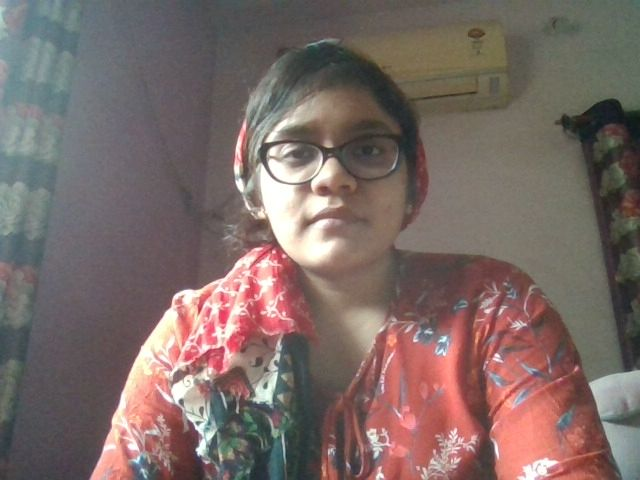

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

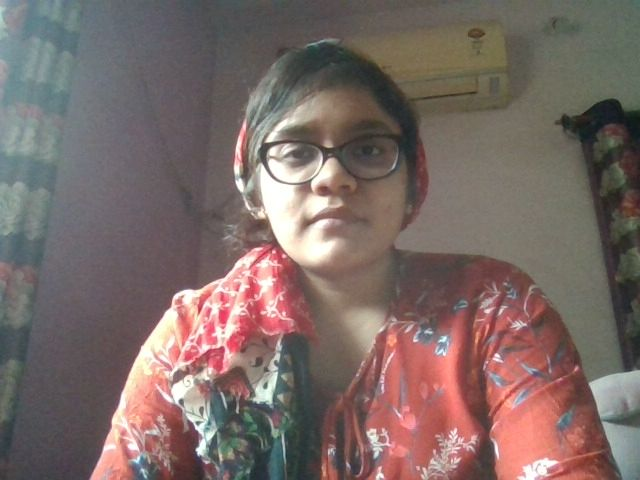

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#from google.colab import files

#uploaded = files.upload()

img = cv2.imread('photo.jpg')       #reads your image
cv2_imshow(img)

####**Negative**
#####<p> ***Apply a negative effect to your selfie</p>***

In [ ]:
negative_img = cv2.bitwise_not(img)
cv2_imshow(negative_img)

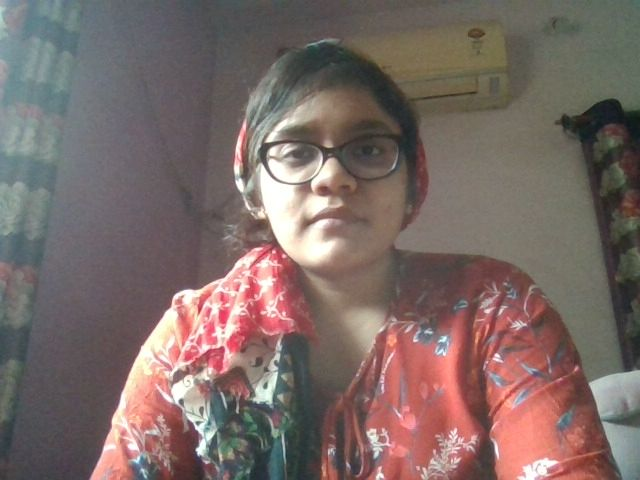

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

#uploaded = files.upload()

img = cv2.imread('photo.jpg')
cv2_imshow(img)

####**Coloured Filters**
#####<p> ***Apply Coloured filters to your image </p>***
You can adjust the (B, G, R) values using the sliders on the right side of the screen.

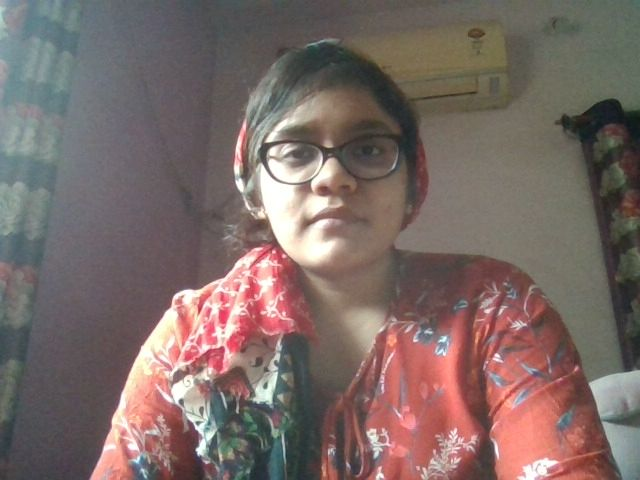

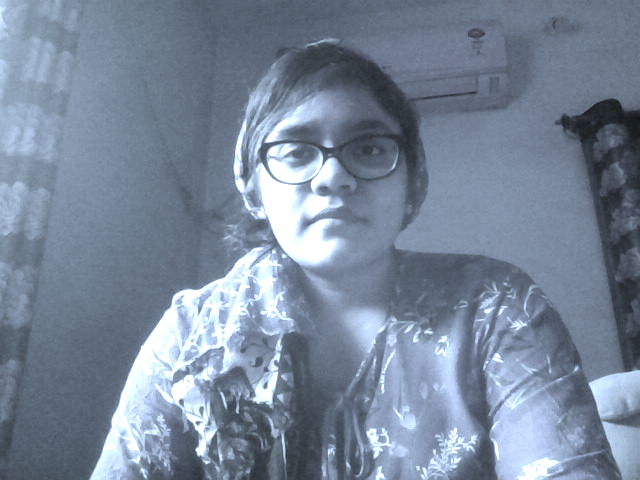

In [62]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

#uploaded = files.upload()

img = cv2.imread('photo.jpg')
cv2_imshow(img)
original = img.copy()
img = np.array(img, dtype=np.float64) # converting to float to prevent loss

#@title Tracking {run:"auto"}
BR = 0.374 #@param{type: "slider", min : 0, max : 1, step : 0.001}
BG = 0.301 #@param{type: "slider", min : 0, max : 1, step : 0.001}
BB = 0.415 #@param{type: "slider", min : 0, max : 1, step : 0.001}
GR = 0.58 #@param{type: "slider", min : 0, max : 1, step : 0.001}
GG = 0.205 #@param{type: "slider", min : 0, max : 1, step : 0.001}
GB = 0.449 #@param{type: "slider", min : 0, max : 1, step : 0.001}
RR = 0.567 #@param{type: "slider", min : 0, max : 1, step : 0.001}
RG = 0.259#@param{type: "slider", min : 0, max : 1, step : 0.001}
RB = 0.591 #@param{type: "slider", min : 0, max : 1, step : 0.001}


img = cv2.transform(img, np.matrix([[RR, RG, RB],
                                    [GR, GG, GB],
                                    [BR, BG, BB]])) # multipying image with special sepia matrix
img[np.where(img > 255)] = 255 # normalizing values greater than 255 to 255
img = np.array(img, dtype=np.uint8)

cv2_imshow(img)

#### **Grayscale your image**
#####***Apply a B/W or Classic filter to your image***

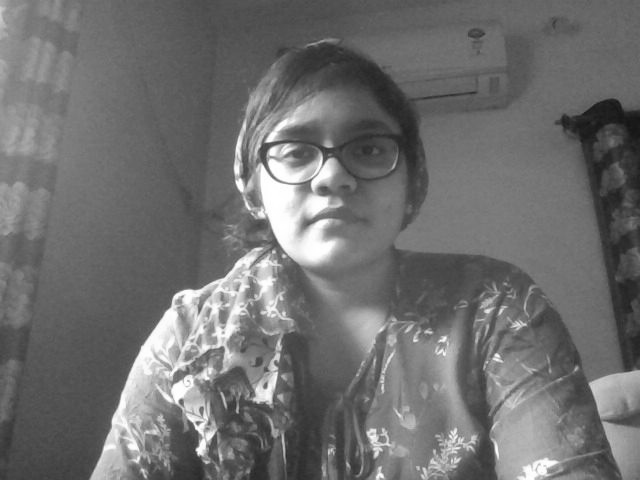

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

#uploaded = files.upload()

img = cv2.imread('photo.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_img)

####**Blurring Effect**
#####***Apply burring effect to your image***
You can change the point of focus by entering different values of x- coordinates and y-coordinates. Also, you can increase or decrease the radius of focus using the radius slider. You can also increase the blurring effect by increasing the kernel value.

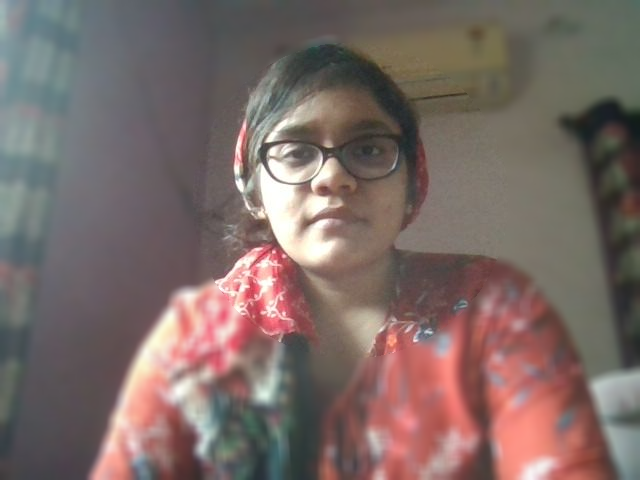

In [ ]:
import cv2
import numpy as np

from google.colab import files

from google.colab.patches import cv2_imshow

#uploaded = files.upload()
# Read image
image = cv2.imread('photo.jpg')

# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Change image to grey where we found white
image2 = image.copy()
#image2[mask > 0] = (170, 170, 170)

#@title Kernel Value 
k = 11 #@param{type: "slider", min : 1, max : 40, step : 2}
image2 = cv2.blur(image2, (k,k))

# Create new rectangular mask that is white on black background
#@title Enter the coordinates of center of the circle
shapes = np.zeros_like(image, np.uint8)
x =  350#@param{type: "number"}
y =  200#@param{type: "number"}
#x,y = 400,200
radius = 158 #@param{type:"slider", min:0, max:350, step: 1}
mask2 = np.zeros_like(image)

cv2.circle(mask2, (x,y), radius, (255, 255, 255), -1)
#mask2 = cv2.GaussianBlur(mask2,(11,11), 0)

# invert mask
mask2_inv = 255 - mask2

# apply mask to image
image_masked = cv2.bitwise_and(image, mask2)

# apply inverted mask to image2
image2_masked = cv2.bitwise_and(image2, mask2_inv)

# add together
result = cv2.add(image_masked, image2_masked)

#cv2_imshow( mask)
#cv2_imshow(image)
#cv2_imshow( image2)
#cv2_imshow( mask2 )
#cv2_imshow( mask2_inv)
#cv2_imshow( image_masked)
#cv2_imshow( image2_masked)
cv2_imshow( result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

####**Other Effects**
#####***Apply other effects to your image***
To add other effects to your image first you have have to upload an image which you will be overlaying on your selfie as it has been shown in below. To adjust the intensity of the effect you can change the alpha and beta values using the slider.

(480, 640, 3)


Saving background_7.png to background_7.png
(480, 640, 3)


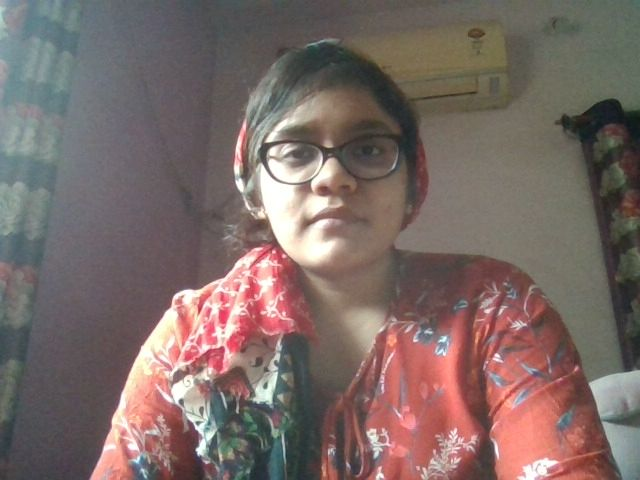

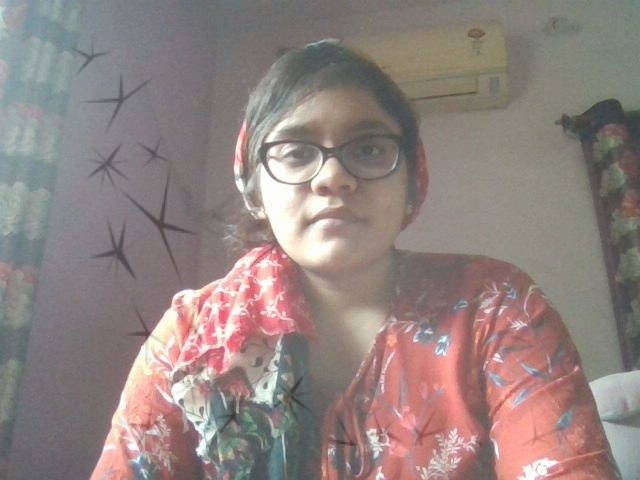

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

#uploaded = files.upload()
background = cv2.imread('photo.jpg')
dimensions1 = background.shape
print(dimensions1)

uploaded = files.upload()
overlay = cv2.imread('background_7.png')
dimensions2 = overlay.shape
print(dimensions2)

#@title Adjust Alpha Values {run:"auto"}
alpha = 0.82 #@param{type: "slider", min : 0, max : 1, step : 0.001}
added_image = cv2.addWeighted(background,alpha,overlay,1-alpha,0)

cv2_imshow(background)
cv2_imshow(added_image)

####**Adding Text**
#####***You can also add text to your selfie***

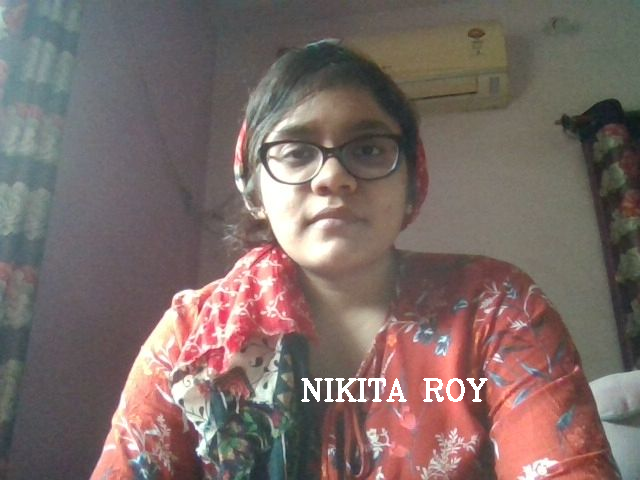

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

#uploaded = files.upload()
image = cv2.imread('photo.jpg')

#@title Select Font Style {run:"auto"}
font_style = "FONT_HERSHEY_COMPLEX" #@param["FONT_HERSHEY_SIMPLEX", "FONT_HERSHEY_PLAIN", "FONT_HERSHEY_DUPLEX", "FONT_HERSHEY_COMPLEX", "FONT_HERSHEY_TRIPLEX", "FONT_HERSHEY_COMPLEX_SMALL", "FONT_HERSHEY_SCRIPT_SIMPLEX", "FONT_HERSHEY_SCRIPT_COMPLEX"] 
#FONT_HERSHEY_SIMPLEX = False #@param{type:"boolean"}
#FONT_HERSHEY_PLAIN = True #@param{type:"boolean"}
if font_style == "FONT_HERSHEY_SIMPLEX":
   font = cv2.FONT_HERSHEY_SIMPLEX
elif font_style == "FONT_HERSHEY_PLAIN":
   font = cv2.FONT_HERSHEY_PLAIN
elif font_style == "FONT_HERSHEY_DUPLEX":
   font = cv2.FONT_HERSHEY_DUPLEX  
elif font_style == "FONT_HERSHEY_COMPLEX":  
   font = cv2.FONT_HERSHEY_COMPLEX  
elif font_style == "FONT_HERSHEY_TRIPLEX":  
   font = cv2.FONT_HERSHEY_TRIPLEX    
elif font_style == "FONT_HERSHEY_COMPLEX_SMALL":
   font = cv2.FONT_HERSHEY_COMPLEX_SMALL
elif font_style == "FONT_HERSHEY_SCRIPT_SIMPLEX":
   font = cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
elif font_style == "FONT_HERSHEY_SCRIPT_COMPLEX":
   font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX                
#if FONT_HERSHEY_SIMPLEX == True:
   #font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, "NIKITA ROY", (300,400), font, 1, (255,255,255), 2)
cv2_imshow(image)